# 第1章 システムデータの加工・可視化を行う20本ノック

In [2]:
ENV["LINES"] = 10
ENV["COLUMNS"] = 1000

1000

In [86]:
using CSV
using Dates
using StringEncodings
using DataFrames
using DataFramesMeta
using Glob
using XLSX
using Gadfly, Cairo

In [4]:
base_dir = "../../data/chapter-1/data"

"../../data/chapter-1/data"

## ノック1 ~ 15

In [5]:
function read_base_file(ifn, header)::DataFrame
    f = CSV.File(
        open(ifn, enc"sjis");
        header=header,
        buffer_in_memory=true,
        types=Dict(1 => String, 2 => String, 3 => String, 4 => String, 9 => String, 13 => String, 14 => String, 15 => String, 16 => String, 17 => String, 18 => String, 20 => String, 24 => String, 28 => String, 30 => String)
    )
    return DataFrame(f)
end

function read_header()::Vector{String}
    ifn = "mst_column_name.txt"
    f = CSV.File(open(joinpath(base_dir, ifn), enc"sjis"); buffer_in_memory=true)
    return DataFrame(f).column_name_en
end

read_header (generic function with 1 method)

ヘッダの読み込み

In [6]:
header = read_header()

30-element Vector{String}:
 "sequenceNumber"
 "corporateNumber"
 "process"
 ⋮
 "furigana"
 "hihyoji"

大元のデータを読み込み

In [7]:
ifn = "22_shizuoka_all_20210331.csv"
ifn = joinpath(base_dir, ifn)
data_df = read_base_file(ifn, header)

Row,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,cityName,streetNumber,addressImageId,prefectureCode,cityCode,postCode,addressOutside,addressOutsideImageId,closeDate,closeCause,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
,String,String,String,String,Date,Date,String,Int64?,String,String15,String31,String?,String?,String,String,String?,String?,String?,Date?,String?,Int64?,String?,Date,String,String?,String15?,String?,String?,String?,String
1,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,missing,101,静岡県,静岡市葵区,城内町１−２０,missing,22,101,4200854,missing,missing,missing,missing,missing,missing,2015-10-05,1,Shizuoka Family Court,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",missing,シズオカカテイサイバンショ,0
2,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,missing,101,静岡県,静岡市清水区,天神１丁目６−１５,missing,22,103,4240809,missing,missing,missing,missing,missing,missing,2015-10-05,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",missing,シミズカンイサイバンショ,0
3,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,missing,101,静岡県,浜松市中区,中央１丁目１２−５,missing,22,131,4300929,missing,missing,missing,missing,missing,missing,2015-10-05,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",missing,ハママツカンイサイバンショ,0
4,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,missing,201,静岡県,磐田市,国府台３−１,missing,22,211,4380077,missing,missing,missing,missing,missing,missing,2015-10-05,1,Iwata City,Shizuoka,"3-1,Kounodai, Iwata shi",missing,イワタシ,0
5,5,1000020222127,01,1,2018-04-05,2015-10-05,焼津市,missing,201,静岡県,焼津市,本町２丁目１６−３２,missing,22,212,4250022,missing,missing,missing,missing,missing,missing,2015-10-05,1,Yaizu city,Shizuoka,"2-16-32 Honmachi, Yaizu shi",missing,ヤイヅシ,0
6,6,1000020222135,01,1,2020-09-29,2015-10-05,掛川市,missing,201,静岡県,掛川市,長谷１丁目１番地の１,missing,22,213,4360047,missing,missing,missing,missing,missing,missing,2015-10-05,1,Kakegawa City,Shizuoka,"1-1-1 Nagaya, Kakegawa shi",missing,カケガワシ,0
7,7,1000020222143,01,1,2018-04-05,2015-10-05,藤枝市,missing,201,静岡県,藤枝市,岡出山１丁目１１−１,missing,22,214,4260026,missing,missing,missing,missing,missing,missing,2015-10-05,1,Fujieda City,Shizuoka,"1-11-1,Okadeyama, Fujieda shi",missing,フジエダシ,0
8,8,1000020222151,01,1,2018-04-05,2015-10-05,御殿場市,missing,201,静岡県,御殿場市,萩原４８３,missing,22,215,4120042,missing,missing,missing,missing,missing,missing,2015-10-05,1,Gotemba City,Shizuoka,"483,Hagiwara, Gotemba shi",missing,ゴテンバシ,0
9,9,1000020222259,01,1,2018-04-05,2015-10-05,伊豆の国市,missing,201,静岡県,伊豆の国市,長岡３４０−１,missing,22,225,4102211,missing,missing,missing,missing,missing,missing,2015-10-05,1,Izunokuni shi,Shizuoka,"Nagaoka340-1, Izunokuni shi",missing,イズノクニシ,0


要約

In [8]:
describe(data_df, :all)

Row,variable,mean,std,min,q25,median,q75,max,nunique,nuniqueall,nmissing,nnonmissing,first,last,eltype
,Symbol,Union…,Union…,Any,Any,Any,Any,Any,Union…,Int64,Int64,Int64,Any,Any,Type
1,sequenceNumber,,,1,,,,99999,114613,114613,0,114613,1,114613,String
2,corporateNumber,,,1000013040008,,,,9700150101659,114613,114613,0,114613,1000013040008,9700150101659,String
3,process,,,01,,,,71,6,6,0,114613,01,01,String
4,correct,,,0,,,,1,2,2,0,114613,1,0,String
5,updateDate,,,2015-10-26,2015-11-13,2016-02-12,2019-02-25,2021-03-31,1316,1316,0,114613,2018-04-02,2021-01-26,Date
6,changeDate,,,2015-10-05,2015-10-05,2015-10-05,2016-03-03,2021-03-31,1344,1344,0,114613,2015-10-05,2021-01-14,Date
7,name,,,◆大合資会社,,,,ｗｏｒｋ２４合同会社,105857,105857,0,114613,静岡家庭裁判所,静岡市茶業振興協議会,String
8,nameImageId,71557.5,11848.5,67209,67695.5,68059.0,68445.0,121799,,1243,113370,1243,missing,missing,"Union{Missing, Int64}"
9,kind,,,101,,,,499,9,9,0,114613,101,499,String


差分情報を追加していく

In [9]:
ifns = glob("$(base_dir)/diff*.csv")
allowmissing!(data_df)
for ifn_i in ifns
    println(ifn_i)
    tmp_df = read_base_file(ifn_i, header)
    @rsubset!(tmp_df, :prefectureName == "静岡県")
    allowmissing!(tmp_df)
    append!(data_df, tmp_df)
end

../../data/chapter-1/data/diff_20210401.csv


../../data/chapter-1/data/diff_20210405.csv
../../data/chapter-1/data/diff_20210406.csv


../../data/chapter-1/data/diff_20210407.csv
../../data/chapter-1/data/diff_20210408.csv
../../data/chapter-1/data/diff_20210409.csv


In [10]:
describe(data_df, :all)

Row,variable,mean,std,min,q25,median,q75,max,nunique,nuniqueall,nmissing,nnonmissing,first,last,eltype
,Symbol,Union…,Union…,Any,Any,Any,Any,Any,Union…,Int64,Int64,Int64,Any,Any,Union
1,sequenceNumber,,,1,,,,99999,114613,114613,0,115020,1,3199,"Union{Missing, String}"
2,corporateNumber,,,1000013040008,,,,9700150101659,114758,114758,0,115020,1000013040008,9080402015836,"Union{Missing, String}"
3,process,,,01,,,,71,6,6,0,115020,01,12,"Union{Missing, String}"
4,correct,,,0,,,,1,2,2,0,115020,1,0,"Union{Missing, String}"
5,updateDate,,,2015-10-26,2015-11-13,2016-02-22,2019-03-05,2021-04-09,1322,1322,0,115020,2018-04-02,2021-04-09,"Union{Missing, Date}"
6,changeDate,,,2015-10-05,2015-10-05,2015-10-05,2016-03-18,2021-04-09,1351,1351,0,115020,2015-10-05,2021-04-01,"Union{Missing, Date}"
7,name,,,◆大合資会社,,,,ｗｏｒｋ２４合同会社,106019,106019,0,115020,静岡家庭裁判所,有限会社エコワークス,"Union{Missing, String}"
8,nameImageId,71636.5,12010.0,67209,67696.2,68059.5,68446.8,122640,,1245,113774,1246,missing,missing,"Union{Missing, Int64}"
9,kind,,,101,,,,499,9,9,0,115020,101,302,"Union{Missing, String}"


In [11]:
unique!(data_df, :corporateNumber)

Row,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,cityName,streetNumber,addressImageId,prefectureCode,cityCode,postCode,addressOutside,addressOutsideImageId,closeDate,closeCause,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
,String?,String?,String?,String?,Date?,Date?,String?,Int64?,String?,String15?,String31?,String?,String?,String?,String?,String?,String?,String?,Date?,String?,Int64?,String?,Date?,String?,String?,String15?,String?,String?,String?,String?
1,1,1000013040008,01,1,2018-04-02,2015-10-05,静岡家庭裁判所,missing,101,静岡県,静岡市葵区,城内町１−２０,missing,22,101,4200854,missing,missing,missing,missing,missing,missing,2015-10-05,1,Shizuoka Family Court,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",missing,シズオカカテイサイバンショ,0
2,2,1000013050072,01,1,2018-04-02,2015-10-05,清水簡易裁判所,missing,101,静岡県,静岡市清水区,天神１丁目６−１５,missing,22,103,4240809,missing,missing,missing,missing,missing,missing,2015-10-05,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",missing,シミズカンイサイバンショ,0
3,3,1000013050080,01,1,2018-04-02,2015-10-05,浜松簡易裁判所,missing,101,静岡県,浜松市中区,中央１丁目１２−５,missing,22,131,4300929,missing,missing,missing,missing,missing,missing,2015-10-05,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",missing,ハママツカンイサイバンショ,0
4,4,1000020222119,01,1,2018-04-05,2015-10-05,磐田市,missing,201,静岡県,磐田市,国府台３−１,missing,22,211,4380077,missing,missing,missing,missing,missing,missing,2015-10-05,1,Iwata City,Shizuoka,"3-1,Kounodai, Iwata shi",missing,イワタシ,0
5,5,1000020222127,01,1,2018-04-05,2015-10-05,焼津市,missing,201,静岡県,焼津市,本町２丁目１６−３２,missing,22,212,4250022,missing,missing,missing,missing,missing,missing,2015-10-05,1,Yaizu city,Shizuoka,"2-16-32 Honmachi, Yaizu shi",missing,ヤイヅシ,0
6,6,1000020222135,01,1,2020-09-29,2015-10-05,掛川市,missing,201,静岡県,掛川市,長谷１丁目１番地の１,missing,22,213,4360047,missing,missing,missing,missing,missing,missing,2015-10-05,1,Kakegawa City,Shizuoka,"1-1-1 Nagaya, Kakegawa shi",missing,カケガワシ,0
7,7,1000020222143,01,1,2018-04-05,2015-10-05,藤枝市,missing,201,静岡県,藤枝市,岡出山１丁目１１−１,missing,22,214,4260026,missing,missing,missing,missing,missing,missing,2015-10-05,1,Fujieda City,Shizuoka,"1-11-1,Okadeyama, Fujieda shi",missing,フジエダシ,0
8,8,1000020222151,01,1,2018-04-05,2015-10-05,御殿場市,missing,201,静岡県,御殿場市,萩原４８３,missing,22,215,4120042,missing,missing,missing,missing,missing,missing,2015-10-05,1,Gotemba City,Shizuoka,"483,Hagiwara, Gotemba shi",missing,ゴテンバシ,0
9,9,1000020222259,01,1,2018-04-05,2015-10-05,伊豆の国市,missing,201,静岡県,伊豆の国市,長岡３４０−１,missing,22,225,4102211,missing,missing,missing,missing,missing,missing,2015-10-05,1,Izunokuni shi,Shizuoka,"Nagaoka340-1, Izunokuni shi",missing,イズノクニシ,0


In [12]:
describe(data_df, :all)

Row,variable,mean,std,min,q25,median,q75,max,nunique,nuniqueall,nmissing,nnonmissing,first,last,eltype
,Symbol,Union…,Union…,Any,Any,Any,Any,Any,Union…,Int64,Int64,Int64,Any,Any,Union
1,sequenceNumber,,,1,,,,99999,114613,114613,0,114758,1,3196,"Union{Missing, String}"
2,corporateNumber,,,1000013040008,,,,9700150101659,114758,114758,0,114758,1000013040008,9080101022431,"Union{Missing, String}"
3,process,,,01,,,,71,6,6,0,114758,01,01,"Union{Missing, String}"
4,correct,,,0,,,,1,2,2,0,114758,1,0,"Union{Missing, String}"
5,updateDate,,,2015-10-26,2015-11-13,2016-02-19,2019-02-27,2021-04-09,1322,1322,0,114758,2018-04-02,2021-04-09,"Union{Missing, Date}"
6,changeDate,,,2015-10-05,2015-10-05,2015-10-05,2016-03-10,2021-04-09,1350,1350,0,114758,2015-10-05,2021-04-09,"Union{Missing, Date}"
7,name,,,◆大合資会社,,,,ｗｏｒｋ２４合同会社,105993,105993,0,114758,静岡家庭裁判所,株式会社ＬＥＳＱＵＡ,"Union{Missing, String}"
8,nameImageId,71639.5,12014.4,67209,67696.0,68060.0,68447.0,122640,,1245,113513,1245,missing,missing,"Union{Missing, Int64}"
9,kind,,,101,,,,499,9,9,0,114758,101,301,"Union{Missing, String}"


マスターを読み込んでマージ

In [13]:
master_ifns = glob("$(base_dir)/mst*.csv")
tmp_df = 0
master_ifn_i = 0
for master_ifn_i in master_ifns
    # if occursin("mst_correct_kbn", master_ifn_i)
    #     f = CSV.File(open(master_ifn_i, enc"sjis"), types=String)
    #     tmp_df = DataFrame(f)
    # else
    #     tmp_df = CSV.read(master_ifn_i, DataFrame; types=String)
    # end
    tmp_df = CSV.read(master_ifn_i, DataFrame; types=String)
    data_df = leftjoin(data_df, tmp_df, on=names(tmp_df)[1], matchmissing=:notequal)
end

In [14]:
data_df

Row,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,cityName,streetNumber,addressImageId,prefectureCode,cityCode,postCode,addressOutside,addressOutsideImageId,closeDate,closeCause,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji,closeCause_name,corp_kind_name,correct_kbn_name,hihyoji_name,latest_name,process_kbn_name
,String?,String?,String?,String?,Date?,Date?,String?,Int64?,String?,String15?,String31?,String?,String?,String?,String?,String?,String?,String?,Date?,String?,Int64?,String?,Date?,String?,String?,String15?,String?,String?,String?,String?,String?,String?,String?,String?,String?,String?
1,33,1010001102636,21,0,2021-02-08,2021-02-02,Ｈ・Ｍ・Ｃ株式会社,missing,301,静岡県,駿東郡長泉町,東野字八分平５１５番９１,missing,22,342,4110931,missing,missing,2021-02-02,11,2010001013246,令和３年２月１日静岡県駿東郡長泉町東野字八分平５１５番９１オーシーインベストメント株式会社（2010001013246）に合併し解散,2015-10-05,1,missing,missing,missing,missing,エイチエムシー,0,合併による解散等,株式会社,\x92\xf9\x90\xb3\x88ȊO,検索対象,最新情報,登記記録の閉鎖等
2,38,1010001144901,21,0,2020-11-10,2020-11-05,エス・ジー・トラスト株式会社,missing,301,静岡県,駿東郡長泉町,東野字八分平５１５番９１,missing,22,342,4110931,missing,missing,2020-11-05,11,3010001012593,令和２年１１月１日静岡県駿東郡長泉町東野字八分平５１５番９１エム・ケー・シー株式会社（3010001012593）に合併し解散,2015-10-05,1,missing,missing,missing,missing,エスジートラスト,0,合併による解散等,株式会社,\x92\xf9\x90\xb3\x88ȊO,検索対象,最新情報,登記記録の閉鎖等
3,39,1010001148290,21,0,2018-03-13,2018-03-07,株式会社秀地ゴルフマネージメント,missing,301,静岡県,駿東郡小山町,須走４９３番地,missing,22,344,4101431,missing,missing,2018-03-07,11,2011101044783,平成３０年３月１日東京都新宿区舟町１番地シティータワー四谷２１０３株式会社秀地コーポレーション（2011101044783）に合併し解散,2015-10-05,1,missing,missing,missing,missing,missing,0,合併による解散等,株式会社,\x92\xf9\x90\xb3\x88ȊO,検索対象,最新情報,登記記録の閉鎖等
4,44,1010002004303,21,0,2017-12-27,2017-12-21,有限会社とみ企画,missing,302,静岡県,熱海市,伊豆山８２０−３プラザ伊豆山６０６,missing,22,205,4130002,missing,missing,2017-12-21,01,missing,missing,2015-10-05,1,missing,missing,missing,missing,missing,0,清算の結了等,有限会社,\x92\xf9\x90\xb3\x88ȊO,検索対象,最新情報,登記記録の閉鎖等
5,45,1010002019243,21,0,2019-06-12,2019-06-06,有限会社ベジ・ファクトリー,missing,302,静岡県,賀茂郡東伊豆町,片瀬６５９番地２,missing,22,301,4130303,missing,missing,2019-06-06,01,missing,missing,2015-10-05,1,missing,missing,missing,missing,ベジファクトリー,0,清算の結了等,有限会社,\x92\xf9\x90\xb3\x88ȊO,検索対象,最新情報,登記記録の閉鎖等
6,46,1010002038598,21,0,2019-01-16,2019-01-07,有限会社プラクティカルアドバンス・エフ,missing,302,静岡県,沼津市,原１１９４番地の１,missing,22,203,4100312,missing,missing,2019-01-07,01,missing,missing,2015-10-05,1,missing,missing,missing,missing,プラクティカルアドバンスエフ,0,清算の結了等,有限会社,\x92\xf9\x90\xb3\x88ȊO,検索対象,最新情報,登記記録の閉鎖等
7,77,1010902002901,21,0,2021-01-07,2020-12-28,有限会社エムケイジー,missing,302,静岡県,伊東市,八幡野１３５５番地２４,missing,22,208,4130232,missing,missing,2020-12-28,01,missing,missing,2015-10-05,1,missing,missing,missing,missing,エムケイジー,0,清算の結了等,有限会社,\x92\xf9\x90\xb3\x88ȊO,検索対象,最新情報,登記記録の閉鎖等
8,86,1011001045775,21,0,2016-05-26,2016-05-23,株式会社シリウス,missing,301,静岡県,裾野市,須山２２５５番地の１２３６,missing,22,220,4101231,missing,missing,2016-05-23,01,missing,missing,2015-10-05,1,missing,missing,missing,missing,missing,0,清算の結了等,株式会社,\x92\xf9\x90\xb3\x88ȊO,検索対象,最新情報,登記記録の閉鎖等
9,87,1011001048472,21,0,2021-02-08,2021-02-02,Ｍ・Ｋ・Ｃ株式会社,missing,301,静岡県,駿東郡長泉町,東野字八分平５１５番９１,missing,22,342,4110931,missing,missing,2021-02-02,11,8011002027337,令和３年２月１日静岡県駿東郡長泉町東野字八分平５１５番９１オーエスマネジメント株式会社（8011002027337）に合併し解散,2015-10-05,1,missing,missing,missing,missing,エムケーシー,0,合併による解散等,株式会社,\x92\xf9\x90\xb3\x88ȊO,検索対象,最新情報,登記記録の閉鎖等


テキストを連結して，住所を修正

In [15]:
target = [:prefectureName, :cityName, :streetNumber]
describe(data_df[:, target])

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Nothing,Abstract…,Nothing,Abstract…,Int64,Union
1,prefectureName,,静岡県,,静岡県,0,"Union{Missing, String15}"
2,cityName,,三島市,,駿東郡長泉町,0,"Union{Missing, String31}"
3,streetNumber,,あさはた１丁目２番１５−４６４号,,９６６４番地の９,17,"Union{Missing, String}"


In [16]:
@rtransform!(data_df, :address = :prefectureName * :cityName * (ismissing(:streetNumber) ? "" : :streetNumber));
describe(data_df[:, [:address]])

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Nothing,String,Nothing,String,Int64,DataType
1,address,,静岡県三島市一丁田２５２番地の３,,静岡県駿東郡長泉町納米里９８番地の１,0,String


In [17]:
@rtransform! data_df begin
    :postCode_head = ismissing(:postCode) ? Missing : :postCode[begin:3]
    :postCode_tail = ismissing(:postCode) ? Missing : :postCode[3:end]
end

Row,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,cityName,streetNumber,addressImageId,prefectureCode,cityCode,postCode,addressOutside,addressOutsideImageId,closeDate,closeCause,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji,closeCause_name,corp_kind_name,correct_kbn_name,hihyoji_name,latest_name,process_kbn_name,address,postCode_head,postCode_tail
,String?,String?,String?,String?,Date?,Date?,String?,Int64?,String?,String15?,String31?,String?,String?,String?,String?,String?,String?,String?,Date?,String?,Int64?,String?,Date?,String?,String?,String15?,String?,String?,String?,String?,String?,String?,String?,String?,String?,String?,String,Any,Any
1,33,1010001102636,21,0,2021-02-08,2021-02-02,Ｈ・Ｍ・Ｃ株式会社,missing,301,静岡県,駿東郡長泉町,東野字八分平５１５番９１,missing,22,342,4110931,missing,missing,2021-02-02,11,2010001013246,令和３年２月１日静岡県駿東郡長泉町東野字八分平５１５番９１オーシーインベストメント株式会社（2010001013246）に合併し解散,2015-10-05,1,missing,missing,missing,missing,エイチエムシー,0,合併による解散等,株式会社,\x92\xf9\x90\xb3\x88ȊO,検索対象,最新情報,登記記録の閉鎖等,静岡県駿東郡長泉町東野字八分平５１５番９１,411,10931
2,38,1010001144901,21,0,2020-11-10,2020-11-05,エス・ジー・トラスト株式会社,missing,301,静岡県,駿東郡長泉町,東野字八分平５１５番９１,missing,22,342,4110931,missing,missing,2020-11-05,11,3010001012593,令和２年１１月１日静岡県駿東郡長泉町東野字八分平５１５番９１エム・ケー・シー株式会社（3010001012593）に合併し解散,2015-10-05,1,missing,missing,missing,missing,エスジートラスト,0,合併による解散等,株式会社,\x92\xf9\x90\xb3\x88ȊO,検索対象,最新情報,登記記録の閉鎖等,静岡県駿東郡長泉町東野字八分平５１５番９１,411,10931
3,39,1010001148290,21,0,2018-03-13,2018-03-07,株式会社秀地ゴルフマネージメント,missing,301,静岡県,駿東郡小山町,須走４９３番地,missing,22,344,4101431,missing,missing,2018-03-07,11,2011101044783,平成３０年３月１日東京都新宿区舟町１番地シティータワー四谷２１０３株式会社秀地コーポレーション（2011101044783）に合併し解散,2015-10-05,1,missing,missing,missing,missing,missing,0,合併による解散等,株式会社,\x92\xf9\x90\xb3\x88ȊO,検索対象,最新情報,登記記録の閉鎖等,静岡県駿東郡小山町須走４９３番地,410,01431
4,44,1010002004303,21,0,2017-12-27,2017-12-21,有限会社とみ企画,missing,302,静岡県,熱海市,伊豆山８２０−３プラザ伊豆山６０６,missing,22,205,4130002,missing,missing,2017-12-21,01,missing,missing,2015-10-05,1,missing,missing,missing,missing,missing,0,清算の結了等,有限会社,\x92\xf9\x90\xb3\x88ȊO,検索対象,最新情報,登記記録の閉鎖等,静岡県熱海市伊豆山８２０−３プラザ伊豆山６０６,413,30002
5,45,1010002019243,21,0,2019-06-12,2019-06-06,有限会社ベジ・ファクトリー,missing,302,静岡県,賀茂郡東伊豆町,片瀬６５９番地２,missing,22,301,4130303,missing,missing,2019-06-06,01,missing,missing,2015-10-05,1,missing,missing,missing,missing,ベジファクトリー,0,清算の結了等,有限会社,\x92\xf9\x90\xb3\x88ȊO,検索対象,最新情報,登記記録の閉鎖等,静岡県賀茂郡東伊豆町片瀬６５９番地２,413,30303
6,46,1010002038598,21,0,2019-01-16,2019-01-07,有限会社プラクティカルアドバンス・エフ,missing,302,静岡県,沼津市,原１１９４番地の１,missing,22,203,4100312,missing,missing,2019-01-07,01,missing,missing,2015-10-05,1,missing,missing,missing,missing,プラクティカルアドバンスエフ,0,清算の結了等,有限会社,\x92\xf9\x90\xb3\x88ȊO,検索対象,最新情報,登記記録の閉鎖等,静岡県沼津市原１１９４番地の１,410,00312
7,77,1010902002901,21,0,2021-01-07,2020-12-28,有限会社エムケイジー,missing,302,静岡県,伊東市,八幡野１３５５番地２４,missing,22,208,4130232,missing,missing,2020-12-28,01,missing,missing,2015-10-05,1,missing,missing,missing,missing,エムケイジー,0,清算の結了等,有限会社,\x92\xf9\x90\xb3\x88ȊO,検索対象,最新情報,登記記録の閉鎖等,静岡県伊東市八幡野１３５５番地２４,413,30232
8,86,1011001045775,21,0,2016-05-26,2016-05-23,株式会社シリウス,missing,301,静岡県,裾野市,須山２２５５番地の１２３６,missing,22,220,4101231,missing,missing,2016-05-23,01,missing,missing,2015-10-05,1,missing,missing,missing,missing,missing,0,清算の結了等,株式会社,\x92\xf9\x90\xb3\x88ȊO,検索対象,最新情報,登記記録の閉鎖等,静岡県裾野市須山２２５５番地の１２３６,410,01231
9,87,1011001048472,21,0,2021-02-08,2021-02-02,Ｍ・Ｋ・Ｃ株式会社,missing,301,静岡県,駿東郡長泉町,東野字八分平５１５番９１,missing,22,342,4110931,missing,missing,2021-02-02,11,8011002027337,令和３年２月１日静岡県駿東郡長泉町東野字八分平５１５番９１オーエスマネジメント株式会社（8011002027337）に合併し解散,2015-10-05,1,missing,missing,missing,missing,エムケーシー,0,合併による解散等,株式会社,\x92\xf9\x90\xb3\x88ȊO,検索対象,最新情報,登記記録の閉鎖等,静岡県駿東郡長泉町東野字八分平５１５番９１,411,10931


日付の加工

In [18]:
@rtransform! data_df begin
    @astable begin
        x = :closeDate - :assignmentDate
        :corporate_life = ismissing(x) ? Missing : x.value
    end
end

Row,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,cityName,streetNumber,addressImageId,prefectureCode,cityCode,postCode,addressOutside,addressOutsideImageId,closeDate,closeCause,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji,closeCause_name,corp_kind_name,correct_kbn_name,hihyoji_name,latest_name,process_kbn_name,address,postCode_head,postCode_tail,corporate_life
,String?,String?,String?,String?,Date?,Date?,String?,Int64?,String?,String15?,String31?,String?,String?,String?,String?,String?,String?,String?,Date?,String?,Int64?,String?,Date?,String?,String?,String15?,String?,String?,String?,String?,String?,String?,String?,String?,String?,String?,String,Any,Any,Any
1,33,1010001102636,21,0,2021-02-08,2021-02-02,Ｈ・Ｍ・Ｃ株式会社,missing,301,静岡県,駿東郡長泉町,東野字八分平５１５番９１,missing,22,342,4110931,missing,missing,2021-02-02,11,2010001013246,令和３年２月１日静岡県駿東郡長泉町東野字八分平５１５番９１オーシーインベストメント株式会社（2010001013246）に合併し解散,2015-10-05,1,missing,missing,missing,missing,エイチエムシー,0,合併による解散等,株式会社,\x92\xf9\x90\xb3\x88ȊO,検索対象,最新情報,登記記録の閉鎖等,静岡県駿東郡長泉町東野字八分平５１５番９１,411,10931,1947
2,38,1010001144901,21,0,2020-11-10,2020-11-05,エス・ジー・トラスト株式会社,missing,301,静岡県,駿東郡長泉町,東野字八分平５１５番９１,missing,22,342,4110931,missing,missing,2020-11-05,11,3010001012593,令和２年１１月１日静岡県駿東郡長泉町東野字八分平５１５番９１エム・ケー・シー株式会社（3010001012593）に合併し解散,2015-10-05,1,missing,missing,missing,missing,エスジートラスト,0,合併による解散等,株式会社,\x92\xf9\x90\xb3\x88ȊO,検索対象,最新情報,登記記録の閉鎖等,静岡県駿東郡長泉町東野字八分平５１５番９１,411,10931,1858
3,39,1010001148290,21,0,2018-03-13,2018-03-07,株式会社秀地ゴルフマネージメント,missing,301,静岡県,駿東郡小山町,須走４９３番地,missing,22,344,4101431,missing,missing,2018-03-07,11,2011101044783,平成３０年３月１日東京都新宿区舟町１番地シティータワー四谷２１０３株式会社秀地コーポレーション（2011101044783）に合併し解散,2015-10-05,1,missing,missing,missing,missing,missing,0,合併による解散等,株式会社,\x92\xf9\x90\xb3\x88ȊO,検索対象,最新情報,登記記録の閉鎖等,静岡県駿東郡小山町須走４９３番地,410,01431,884
4,44,1010002004303,21,0,2017-12-27,2017-12-21,有限会社とみ企画,missing,302,静岡県,熱海市,伊豆山８２０−３プラザ伊豆山６０６,missing,22,205,4130002,missing,missing,2017-12-21,01,missing,missing,2015-10-05,1,missing,missing,missing,missing,missing,0,清算の結了等,有限会社,\x92\xf9\x90\xb3\x88ȊO,検索対象,最新情報,登記記録の閉鎖等,静岡県熱海市伊豆山８２０−３プラザ伊豆山６０６,413,30002,808
5,45,1010002019243,21,0,2019-06-12,2019-06-06,有限会社ベジ・ファクトリー,missing,302,静岡県,賀茂郡東伊豆町,片瀬６５９番地２,missing,22,301,4130303,missing,missing,2019-06-06,01,missing,missing,2015-10-05,1,missing,missing,missing,missing,ベジファクトリー,0,清算の結了等,有限会社,\x92\xf9\x90\xb3\x88ȊO,検索対象,最新情報,登記記録の閉鎖等,静岡県賀茂郡東伊豆町片瀬６５９番地２,413,30303,1340
6,46,1010002038598,21,0,2019-01-16,2019-01-07,有限会社プラクティカルアドバンス・エフ,missing,302,静岡県,沼津市,原１１９４番地の１,missing,22,203,4100312,missing,missing,2019-01-07,01,missing,missing,2015-10-05,1,missing,missing,missing,missing,プラクティカルアドバンスエフ,0,清算の結了等,有限会社,\x92\xf9\x90\xb3\x88ȊO,検索対象,最新情報,登記記録の閉鎖等,静岡県沼津市原１１９４番地の１,410,00312,1190
7,77,1010902002901,21,0,2021-01-07,2020-12-28,有限会社エムケイジー,missing,302,静岡県,伊東市,八幡野１３５５番地２４,missing,22,208,4130232,missing,missing,2020-12-28,01,missing,missing,2015-10-05,1,missing,missing,missing,missing,エムケイジー,0,清算の結了等,有限会社,\x92\xf9\x90\xb3\x88ȊO,検索対象,最新情報,登記記録の閉鎖等,静岡県伊東市八幡野１３５５番地２４,413,30232,1911
8,86,1011001045775,21,0,2016-05-26,2016-05-23,株式会社シリウス,missing,301,静岡県,裾野市,須山２２５５番地の１２３６,missing,22,220,4101231,missing,missing,2016-05-23,01,missing,missing,2015-10-05,1,missing,missing,missing,missing,missing,0,清算の結了等,株式会社,\x92\xf9\x90\xb3\x88ȊO,検索対象,最新情報,登記記録の閉鎖等,静岡県裾野市須山２２５５番地の１２３６,410,01231,231
9,87,1011001048472,21,0,2021-02-08,2021-02-02,Ｍ・Ｋ・Ｃ株式会社,missing,301,静岡県,駿東郡長泉町,東野字八分平５１５番９１,missing,22,342,4110931,missing,missing,2021-02-02,11,8011002027337,令和３年２月１日静岡県駿東郡長泉町東野字八分平５１５番９１オーエスマネジメント株式会社（8011002027337）に合併し解散,2015-10-05,1,missing,missing,missing,missing,エムケーシー,0,合併による解散等,株式会社,\x92\xf9\x90\xb3\x88ȊO,検索対象,最新情報,登記記録の閉鎖等,静岡県駿東郡長泉町東野字八分平５１５番９１,411,10931,1947


In [19]:
sum(ismissing.(data_df.closeCause)) == sum(ismissing.(data_df.closeDate))

true

年度を設定

In [20]:
@rtransform! data_df begin
    @astable begin
        :update_year = year(:updateDate)
        :update_month = month(:updateDate)
        :update_fiscal_year = :update_month < 4 ? :update_year - 1 : :update_year
    end
end

Row,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,cityName,streetNumber,addressImageId,prefectureCode,cityCode,postCode,addressOutside,addressOutsideImageId,closeDate,closeCause,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji,closeCause_name,corp_kind_name,correct_kbn_name,hihyoji_name,latest_name,process_kbn_name,address,postCode_head,postCode_tail,corporate_life,update_year,update_month,update_fiscal_year
,String?,String?,String?,String?,Date?,Date?,String?,Int64?,String?,String15?,String31?,String?,String?,String?,String?,String?,String?,String?,Date?,String?,Int64?,String?,Date?,String?,String?,String15?,String?,String?,String?,String?,String?,String?,String?,String?,String?,String?,String,Any,Any,Any,Int64,Int64,Int64
1,33,1010001102636,21,0,2021-02-08,2021-02-02,Ｈ・Ｍ・Ｃ株式会社,missing,301,静岡県,駿東郡長泉町,東野字八分平５１５番９１,missing,22,342,4110931,missing,missing,2021-02-02,11,2010001013246,令和３年２月１日静岡県駿東郡長泉町東野字八分平５１５番９１オーシーインベストメント株式会社（2010001013246）に合併し解散,2015-10-05,1,missing,missing,missing,missing,エイチエムシー,0,合併による解散等,株式会社,\x92\xf9\x90\xb3\x88ȊO,検索対象,最新情報,登記記録の閉鎖等,静岡県駿東郡長泉町東野字八分平５１５番９１,411,10931,1947,2021,2,2020
2,38,1010001144901,21,0,2020-11-10,2020-11-05,エス・ジー・トラスト株式会社,missing,301,静岡県,駿東郡長泉町,東野字八分平５１５番９１,missing,22,342,4110931,missing,missing,2020-11-05,11,3010001012593,令和２年１１月１日静岡県駿東郡長泉町東野字八分平５１５番９１エム・ケー・シー株式会社（3010001012593）に合併し解散,2015-10-05,1,missing,missing,missing,missing,エスジートラスト,0,合併による解散等,株式会社,\x92\xf9\x90\xb3\x88ȊO,検索対象,最新情報,登記記録の閉鎖等,静岡県駿東郡長泉町東野字八分平５１５番９１,411,10931,1858,2020,11,2020
3,39,1010001148290,21,0,2018-03-13,2018-03-07,株式会社秀地ゴルフマネージメント,missing,301,静岡県,駿東郡小山町,須走４９３番地,missing,22,344,4101431,missing,missing,2018-03-07,11,2011101044783,平成３０年３月１日東京都新宿区舟町１番地シティータワー四谷２１０３株式会社秀地コーポレーション（2011101044783）に合併し解散,2015-10-05,1,missing,missing,missing,missing,missing,0,合併による解散等,株式会社,\x92\xf9\x90\xb3\x88ȊO,検索対象,最新情報,登記記録の閉鎖等,静岡県駿東郡小山町須走４９３番地,410,01431,884,2018,3,2017
4,44,1010002004303,21,0,2017-12-27,2017-12-21,有限会社とみ企画,missing,302,静岡県,熱海市,伊豆山８２０−３プラザ伊豆山６０６,missing,22,205,4130002,missing,missing,2017-12-21,01,missing,missing,2015-10-05,1,missing,missing,missing,missing,missing,0,清算の結了等,有限会社,\x92\xf9\x90\xb3\x88ȊO,検索対象,最新情報,登記記録の閉鎖等,静岡県熱海市伊豆山８２０−３プラザ伊豆山６０６,413,30002,808,2017,12,2017
5,45,1010002019243,21,0,2019-06-12,2019-06-06,有限会社ベジ・ファクトリー,missing,302,静岡県,賀茂郡東伊豆町,片瀬６５９番地２,missing,22,301,4130303,missing,missing,2019-06-06,01,missing,missing,2015-10-05,1,missing,missing,missing,missing,ベジファクトリー,0,清算の結了等,有限会社,\x92\xf9\x90\xb3\x88ȊO,検索対象,最新情報,登記記録の閉鎖等,静岡県賀茂郡東伊豆町片瀬６５９番地２,413,30303,1340,2019,6,2019
6,46,1010002038598,21,0,2019-01-16,2019-01-07,有限会社プラクティカルアドバンス・エフ,missing,302,静岡県,沼津市,原１１９４番地の１,missing,22,203,4100312,missing,missing,2019-01-07,01,missing,missing,2015-10-05,1,missing,missing,missing,missing,プラクティカルアドバンスエフ,0,清算の結了等,有限会社,\x92\xf9\x90\xb3\x88ȊO,検索対象,最新情報,登記記録の閉鎖等,静岡県沼津市原１１９４番地の１,410,00312,1190,2019,1,2018
7,77,1010902002901,21,0,2021-01-07,2020-12-28,有限会社エムケイジー,missing,302,静岡県,伊東市,八幡野１３５５番地２４,missing,22,208,4130232,missing,missing,2020-12-28,01,missing,missing,2015-10-05,1,missing,missing,missing,missing,エムケイジー,0,清算の結了等,有限会社,\x92\xf9\x90\xb3\x88ȊO,検索対象,最新情報,登記記録の閉鎖等,静岡県伊東市八幡野１３５５番地２４,413,30232,1911,2021,1,2020
8,86,1011001045775,21,0,2016-05-26,2016-05-23,株式会社シリウス,missing,301,静岡県,裾野市,須山２２５５番地の１２３６,missing,22,220,4101231,missing,missing,2016-05-23,01,missing,missing,2015-10-05,1,missing,missing,missing,missing,missing,0,清算の結了等,株式会社,\x92\xf9\x90\xb3\x88ȊO,検索対象,最新情報,登記記録の閉鎖等,静岡県裾野市須山２２５５番地の１２３６,410,01231,231,2016,5,2016
9,87,1011001048472,21,0,2021-02-08,2021-02-02,Ｍ・Ｋ・Ｃ株式会社,missing,301,静岡県,駿東郡長泉町,東野字八分平５１５番９１,missing,22,342,4110931,missing,missing,2021-02-02,11,8011002027337,令和３年２月１日静岡県駿東郡長泉町東野字八分平５１５番９１オーエスマネジメント株式会社（8011002027337）に合併し解散,2015-10-05,1,missing,missing,missing,missing,エムケーシー,0,合併による解散等,株式会社,\x92\xf9\x90\xb3\x88ȊO,検索対象,最新情報,登記記録の閉鎖等,静岡県駿東郡長泉町東野字八分平５１５番９１,411,10931,1947,2021,2,2

In [21]:
output_dir = "$(base_dir)/output_julia"
mkpath(output_dir)

"../../data/chapter-1/data/output_julia"

In [22]:
ofn = "processed_shizuoka.csv"
CSV.write(joinpath(output_dir, ofn), data_df)

"../../data/chapter-1/data/output_julia/processed_shizuoka.csv"

In [23]:
ofn = "processed_shizuoka.xlsx"
XLSX.writetable(joinpath(output_dir, ofn), data_df)

ErrorException: Unsupported datatype DataType for writing data to Excel file. Supported data types are Union{Missing, Bool, Float64, Int64, Date, DateTime, Time, String} or XLSX.CellValue.

In [24]:
for i in eachcol(data_df)
    print(eltype(i))
end

Union{

Missing, String}Union{Missing, String}Union{Missing, String}Union{Missing, String}Union{Missing, Date}Union{Missing, Date}Union{Missing, String}Union{Missing, Int64}Union{Missing, String}Union{Missing, String15}Union{Missing, String31}Union{Missing, String}Union{Missing, String}Union{Missing, String}Union{Missing, String}Union{Missing, String}Union{Missing, String}Union{Missing, String}Union{Missing, Date}Union{Missing, String}Union{Missing, Int64}Union{Missing, String}Union{Missing, Date}Union{Missing, String}Union{Missing, String}Union{Missing, String15}Union{Missing, String}Union{Missing, String}Union{Missing, String}Union{Missing, String}Union{Missing, String}Union{Missing, String}Union{Missing, String}Union{Missing, String}Union{Missing, String}Union{Missing, String}StringAnyAnyAnyInt64Int64Int64

In [25]:
targets = [:cityName,  :assignmentsDate, :updateDate, :update_fiscal_year, :update_YM]
data_df = @chain data_df begin
    @rtransform(:update_YM = year(:updateDate) * 100 + month(:updateDate))
    @select(:cityName, :corporateNumber, :name, :corp_kind_name, :process, :process_kbn_name, :assignmentDate, :updateDate, :update_fiscal_year, :update_YM)
end

Row,cityName,corporateNumber,name,corp_kind_name,process,process_kbn_name,assignmentDate,updateDate,update_fiscal_year,update_YM
,String31?,String?,String?,String?,String?,String?,Date?,Date?,Int64,Int64
1,駿東郡長泉町,1010001102636,Ｈ・Ｍ・Ｃ株式会社,株式会社,21,登記記録の閉鎖等,2015-10-05,2021-02-08,2020,202102
2,駿東郡長泉町,1010001144901,エス・ジー・トラスト株式会社,株式会社,21,登記記録の閉鎖等,2015-10-05,2020-11-10,2020,202011
3,駿東郡小山町,1010001148290,株式会社秀地ゴルフマネージメント,株式会社,21,登記記録の閉鎖等,2015-10-05,2018-03-13,2017,201803
4,熱海市,1010002004303,有限会社とみ企画,有限会社,21,登記記録の閉鎖等,2015-10-05,2017-12-27,2017,201712
5,賀茂郡東伊豆町,1010002019243,有限会社ベジ・ファクトリー,有限会社,21,登記記録の閉鎖等,2015-10-05,2019-06-12,2019,201906
6,沼津市,1010002038598,有限会社プラクティカルアドバンス・エフ,有限会社,21,登記記録の閉鎖等,2015-10-05,2019-01-16,2018,201901
7,伊東市,1010902002901,有限会社エムケイジー,有限会社,21,登記記録の閉鎖等,2015-10-05,2021-01-07,2020,202101
8,裾野市,1011001045775,株式会社シリウス,株式会社,21,登記記録の閉鎖等,2015-10-05,2016-05-26,2016,201605
9,駿東郡長泉町,1011001048472,Ｍ・Ｋ・Ｃ株式会社,株式会社,21,登記記録の閉鎖等,2015-10-05,2021-02-08,2020,202102


In [26]:
select!(data_df, Not(:process))

Row,cityName,corporateNumber,name,corp_kind_name,process_kbn_name,assignmentDate,updateDate,update_fiscal_year,update_YM
,String31?,String?,String?,String?,String?,Date?,Date?,Int64,Int64
1,駿東郡長泉町,1010001102636,Ｈ・Ｍ・Ｃ株式会社,株式会社,登記記録の閉鎖等,2015-10-05,2021-02-08,2020,202102
2,駿東郡長泉町,1010001144901,エス・ジー・トラスト株式会社,株式会社,登記記録の閉鎖等,2015-10-05,2020-11-10,2020,202011
3,駿東郡小山町,1010001148290,株式会社秀地ゴルフマネージメント,株式会社,登記記録の閉鎖等,2015-10-05,2018-03-13,2017,201803
4,熱海市,1010002004303,有限会社とみ企画,有限会社,登記記録の閉鎖等,2015-10-05,2017-12-27,2017,201712
5,賀茂郡東伊豆町,1010002019243,有限会社ベジ・ファクトリー,有限会社,登記記録の閉鎖等,2015-10-05,2019-06-12,2019,201906
6,沼津市,1010002038598,有限会社プラクティカルアドバンス・エフ,有限会社,登記記録の閉鎖等,2015-10-05,2019-01-16,2018,201901
7,伊東市,1010902002901,有限会社エムケイジー,有限会社,登記記録の閉鎖等,2015-10-05,2021-01-07,2020,202101
8,裾野市,1011001045775,株式会社シリウス,株式会社,登記記録の閉鎖等,2015-10-05,2016-05-26,2016,201605
9,駿東郡長泉町,1011001048472,Ｍ・Ｋ・Ｃ株式会社,株式会社,登記記録の閉鎖等,2015-10-05,2021-02-08,2020,202102


In [27]:
@chain data_df begin
    groupby(:corp_kind_name)
    @combine(:size = length(:corp_kind_name))
    sort(:size, rev=true)
end

Row,corp_kind_name,size
,String?,Int64
1,株式会社,51325
2,有限会社,42880
3,その他の設立登記法人,14346
4,合同会社,3589
5,合資会社,1668
6,その他,498
7,合名会社,244
8,地方公共団体,192
9,国の機関,16


In [28]:
@chain data_df begin
    groupby(:update_fiscal_year)
    @combine(:size = length(:update_fiscal_year))
    sort(:update_fiscal_year, rev=false)
end

Row,update_fiscal_year,size
,Int64,Int64
1,2015,57833
2,2016,4379
3,2017,4044
4,2018,20959
5,2019,14996
6,2020,12402
7,2021,145


In [29]:
@chain data_df begin
    groupby([:update_fiscal_year, :corp_kind_name])
    @combine(:size = length(:corporateNumber))
    sort([:update_fiscal_year, :corp_kind_name])
end

Row,update_fiscal_year,corp_kind_name,size
,Int64,String?,Int64
1,2015,その他の設立登記法人,6606
2,2015,合同会社,891
3,2015,合名会社,200
4,2015,合資会社,1481
5,2015,有限会社,30700
6,2015,株式会社,17955
7,2016,その他,3
8,2016,その他の設立登記法人,275
9,2016,合同会社,311


In [30]:
b_df = @chain data_df begin
    groupby([:update_fiscal_year, :corp_kind_name])
    @combine(:size = length(:corporateNumber))
    unstack(:corp_kind_name, :update_fiscal_year, :size)
    sort(:corp_kind_name)
end

Row,corp_kind_name,2020,2017,2019,2018,2016,2015,2021
,String?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?
1,その他,38,missing,28,429,3,missing,missing
2,その他の設立登記法人,1186,246,1760,4259,275,6606,14
3,合同会社,748,352,635,617,311,891,35
4,合名会社,7,4,9,19,5,200,missing
5,合資会社,34,21,47,58,27,1481,missing
6,国の機関,missing,missing,missing,16,missing,missing,missing
7,地方公共団体,128,missing,missing,64,missing,missing,missing
8,有限会社,2974,1249,3063,3475,1419,30700,missing
9,株式会社,7287,2172,9454,12022,2339,17955,96


In [31]:
names(b_df)

8-element Vector{String}:
 "corp_kind_name"
 "2020"
 "2017"
 ⋮
 "2015"
 "2021"

法人数を可視化

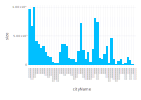

In [34]:
@chain data_df begin
    groupby(:cityName)
    @combine(:size = length(:cityName))
    plot(x = :cityName, y = :size, Geom.bar)
end

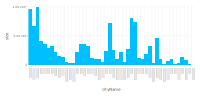

In [40]:
set_default_plot_size(20cm, 10cm)
@chain data_df begin
    groupby(:cityName)
    @combine(:size = length(:cityName))
    plot(x = :cityName, y = :size, Geom.bar)
end

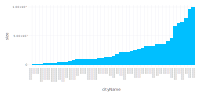

In [47]:
set_default_plot_size(20cm, 10cm)
@chain data_df begin
    groupby(:cityName)
    @combine(:size = length(:cityName))
    sort(:size)
    plot(x = :cityName, y = :size, Geom.bar)
end

In [48]:
set_default_plot_size(10cm, 20cm)
@chain data_df begin
    groupby(:cityName)
    @combine(:size = length(:cityName))
    sort(:size, rev=true)
    plot(x = :cityName, y = :size, Geom.bar(orientation=:horizontal))
end

Plot(...)

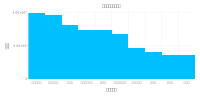

In [54]:
set_default_plot_size(20cm, 10cm)
@chain data_df begin
    groupby(:cityName)
    @combine(:size = length(:cityName))
    sort(:size, rev=true)
    first(10)
    plot(x = :cityName, y = :size, Geom.bar, Guide.xlabel("市区町村名"), Guide.ylabel("法人数"), Guide.title("市区町村別の法人数"))
end

ノック17

ノック18

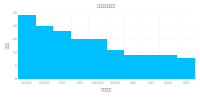

In [68]:
set_default_plot_size(20cm, 10cm)
@chain data_df begin
    @rsubset begin
        (Date(2021, 6, 9) .- :assignmentDate) .<= Day(90)
        :process_kbn_name == "新規"
    end
    groupby(:cityName)
    @combine(:size = length(:cityName))
    sort(:size, rev=true)
    first(10)
    plot(x = :cityName, y = :size, Geom.bar, Guide.xlabel("市区町村名"), Guide.ylabel("法人数"), Guide.title("市区町村別の法人数"))
end

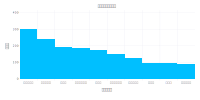

In [70]:
set_default_plot_size(20cm, 10cm)
@chain data_df begin
    @rsubset begin
        (Date(2020, 4, 16) .- :assignmentDate) .<= Day(90)
        :process_kbn_name == "新規"
    end
    groupby(:cityName)
    @combine(:size = length(:cityName))
    sort(:size, rev=true)
    first(10)
    plot(x = :cityName, y = :size, Geom.bar, Guide.xlabel("市区町村名"), Guide.ylabel("法人数"), Guide.title("市区町村別の法人数"))
end

In [88]:
set_default_plot_size(20cm, 10cm)
plt = @chain data_df begin
    @rsubset begin
        occursin(r"^.*区$", :cityName)
        2016 <= :update_fiscal_year < 2021
    end
    groupby([:cityName, :update_fiscal_year])
    @combine(:size = length(:cityName))
    plot(x = :update_fiscal_year, y = :size, color = :cityName, Geom.line)
end
img = SVG("./myplot.svg", 20cm, 10cm)
draw(img, plt)

false